In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
%matplotlib widget

In [18]:
config = {
    "path": {
        "bench_tcp": "/Users/elvissabanovic/Projects/research-ml-inference/bench/zmq/build/tcp_metrics.csv", # Sending 1M msgs took 01:05
        "bench_uds": "/Users/elvissabanovic/Projects/research-ml-inference/bench/zmq/build/uds_metrics.csv", # Sending 1M msgs took 01:01
        "extended_rr_uds": "/Users/elvissabanovic/Projects/research-ml-inference/data/extended_request_reply_1000000.csv",
    }
}

uds_df = pd.read_csv(config['path']['bench_uds'])
tcp_df = pd.read_csv(config['path']['bench_tcp'])

([<matplotlib.patches.Wedge at 0x138bf7500>,
 [Text(-0.9694658681125526, 0.5197460250591386, 'uds > tcp'),
  Text(0.9694070293807636, -0.519855760175035, 'tcp > uds'),
  Text(1.0999999929406878, -0.00012462137471369743, 'uds == tcp')],
 [Text(-0.5287995644250286, 0.2834978318504392, '84.3%'),
  Text(0.5287674705713256, -0.28355768736820086, '15.7%'),
  Text(0.599999996149466, -6.79752952983804e-05, '0.0%')])

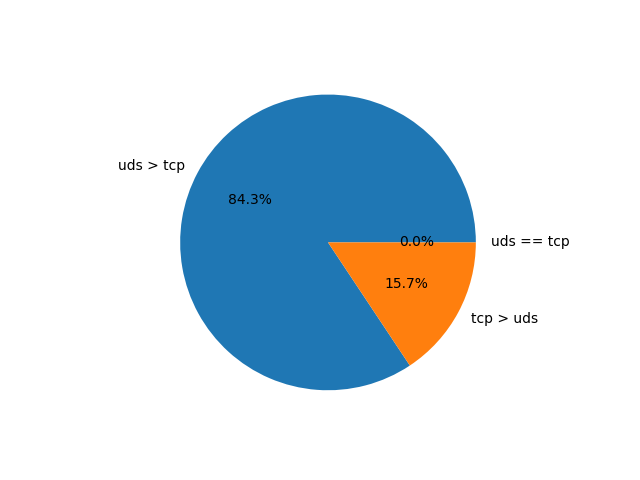

In [19]:
diff = tcp_df['response_time_ms'] - uds_df['response_time_ms']

uds_better_then_tcp = diff.where(lambda x: x > 0).dropna()
tcp_better_then_uds = diff.where(lambda x: x < 0).dropna()
equal = diff.where(lambda x: x == 0).dropna()

labels = ['uds > tcp', 'tcp > uds', 'uds == tcp']
data = [uds_better_then_tcp.count(), tcp_better_then_uds.count(), equal.count()]

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')

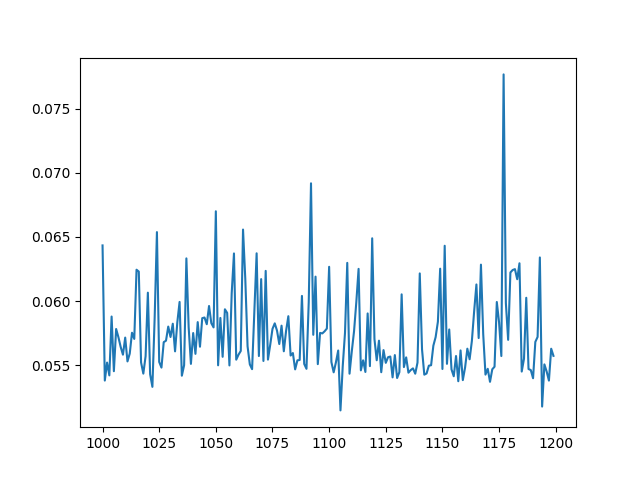

In [4]:
fig, ax = plt.subplots()
ax.plot(uds_df['response_time_ms'][1000:1200])

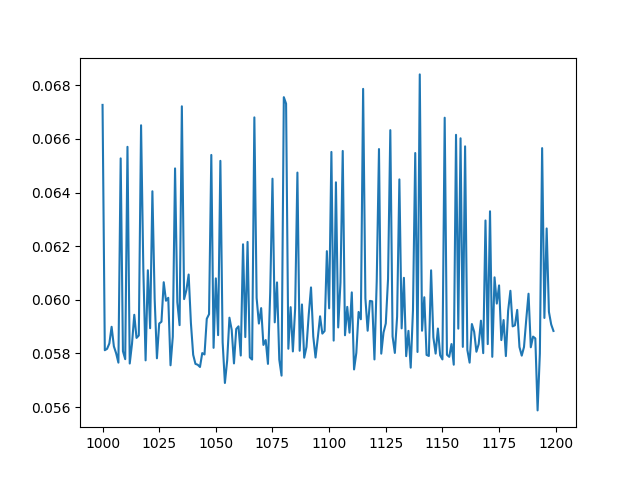

In [5]:
fig, ax = plt.subplots()
ax.plot(tcp_df['response_time_ms'][1000:1200])

In [57]:
def to_ms(ns):
    return ns / 1_000_000

df = pd.read_csv("/Users/elvissabanovic/Projects/research-ml-inference/rust/extended_request_reply_50000.csv")
df['elapsed_time_ns'].apply(to_ms).describe()

count    50000.000000
mean         1.328225
std          0.620103
min          0.331917
25%          1.009823
50%          1.342021
75%          1.555427
max         34.844417
Name: elapsed_time_ns, dtype: float64

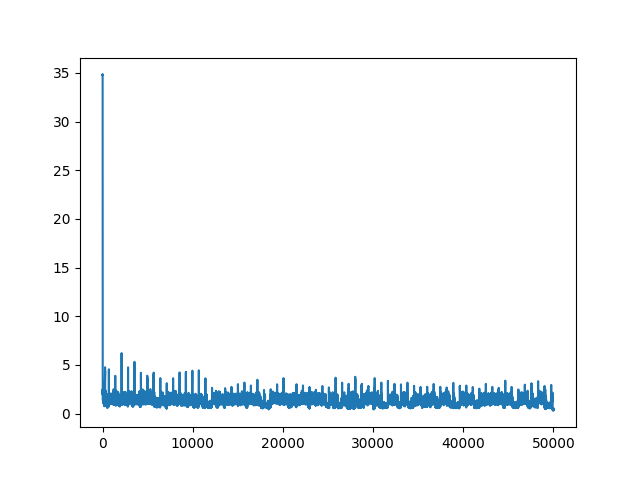

In [58]:
fig, ax = plt.subplots()
k = df['elapsed_time_ns'].apply(to_ms)
ax.plot(k)

In [61]:
50000 / 10.22

4892.367906066536